<html>
    <a id="toc"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>TABLE OF CONTENTS</b></center></h1>
    
</html>

* [1. MOTIVATION](#1)

* [2. DATASET](#2)

* [3. OVERVIEW](#3)

* [4. VISUALIZATIONS](#4)
  
  * [4.1 UNIVARIATE ANALYSIS](#4.1)
    * [4.1.1. CATEGORICAL FEATURES](#4.1.1)
    * [4.1.2  CONTINUOUS FEATURES](#4.1.2)
    
* [5. MODEL & PREDICTION](#5)
  * [5.1 OPTUNA+ONE HOT ENCODING+ENSEMBLING](#5.1)
    * [5.1.2 RANDOM FOREST CLASSIFIER](#5.1.2)
    * [5.1.2 LGBM CLASSIFIER](#5.1.2)
    
  * [5.2 OPTUNA+LABEL ENCODING+ENSEMBLING](#5.2)
    * [5.2.1 RANDOM FOREST CLASSIFIER](#5.2.1)
    * [5.2.2 LGBM CLASSIFIER](#5.2.2)



[Slide to top](#toc)
<html>
    <a id="1"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>1. MOTIVATION</b></center></h1>
    
</html>

![STROKE](https://knoxvillecpr.com/wp-content/uploads/2014/04/stroke.jpg)



1. **A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures)**

2. **When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die**

3. **According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths**

3. **80 percent of strokes are preventable, if we can predict this early we can save many lives**

[Slide to top](#toc)
<html>
    <a id="2"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>2. DATASET</b></center></h1>
    
</html>

1. **This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**

**Features are:**

1. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart    disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not


[Slide to top](#toc)
<html>
    <a id="3"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>3. OVERVIEW</b></center></h1>
    
</html>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import pickle

In [8]:
print(np.__version__)
print(pd.__version__)


1.19.5
1.2.2


In [9]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
print("***** First Five Rows of Dataset *****")
df.head()

***** First Five Rows of Dataset *****


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print("***** Shape of dataset *****")
df.shape

***** Shape of dataset *****


(5110, 12)

In [10]:
L=list(df.columns)
print("***** Column names of dataset *****")
print()
print(L)

***** Column names of dataset *****

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [11]:
print('***** Description of dataset *****')
print()
df.describe()

***** Description of dataset *****



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
print("***** Basic Information about dataset *****")
print()
print(df.info())

***** Basic Information about dataset *****

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


**Checking null values**

In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Used mean of bmi to fill all null values**

In [14]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
print("Mean value of bmi is : ",df['bmi'].mean())

Mean value of bmi is :  28.89323691179472


In [15]:
cat_columns=['gender' , 'hypertension' , 'ever_married' , 'work_type' , 'heart_disease' , 'Residence_type' , 'smoking_status']
print("***** Value counts in categorical features *****")
print()

for i in cat_columns:
    print("Value counts of",i,'feature are : ')
    print(df[i].value_counts())
    print()

***** Value counts in categorical features *****

Value counts of gender feature are : 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Value counts of hypertension feature are : 
0    4612
1     498
Name: hypertension, dtype: int64

Value counts of ever_married feature are : 
Yes    3353
No     1757
Name: ever_married, dtype: int64

Value counts of work_type feature are : 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Value counts of heart_disease feature are : 
0    4834
1     276
Name: heart_disease, dtype: int64

Value counts of Residence_type feature are : 
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Value counts of smoking_status feature are : 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [16]:
#Dropping 'id' column
df=df.drop('id',axis=1)


[Slide to top](#toc)
<html>
    <a id="4"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>4. VISUALIZATIONS</b></center></h1>
    
</html>

In [17]:
print("***** Value Count of 'stroke' column *****")
df['stroke'].value_counts()

***** Value Count of 'stroke' column *****


0    4861
1     249
Name: stroke, dtype: int64

**DATA IS IMBALANCED**

In [18]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=10)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=10)

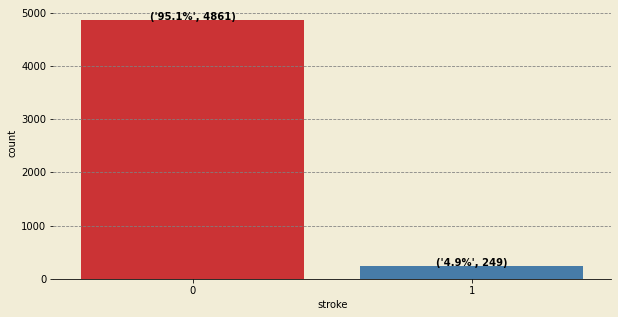

In [19]:
fig=plt.figure(figsize=(10,5))
#Setting Colour
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

#count plot
x_stroke=sns.countplot(data=df,x='stroke',palette="Set1")

#with percentages
without_hue(df,'stroke',x_stroke)

[Slide to top](#toc)
<html>
    <a id="4.1"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>4.1. UNIVARIATE ANALYSIS</b></center></h1>
    
</html>

[Slide to top](#toc)
<html>
    <a id="4.1.1"></a>
    <h1 style='color:#B1624EFF;background-color:#5CC8D7FF;font-size:20px;padding:10px;'><center><b>4.1.1. CATEGORICAL FEATURES</b></center></h1>
    
</html>

**1. CATEGORICAL VALUES : ['gender' , 'hypertension' , 'ever_married' , 'work_type' , 'heart_disease' , 'Residence_type' , 'smoking_status']**

In [21]:
def plotting_cat_features(nrows,ncols,cat_columns):
    
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,19))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Count plot of\ncategorical features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=15,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Count plot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=15,fontstyle='italic')

            else:
                #Without hueness
                if(j==0):
                    a1=sns.countplot(data=df,x=cat_columns[i-1],palette='rocket',ax=ax[i][j])
                    without_hue(df,cat_columns[i-1],a1)
                #With hueness
                elif(j==1):
                    a2=sns.countplot(data=df,x=cat_columns[i-1],hue='stroke',ax=ax[i][j],palette='rocket')
                    with_hue(df,cat_columns[i-1],a2)
                
                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')
        
        
    

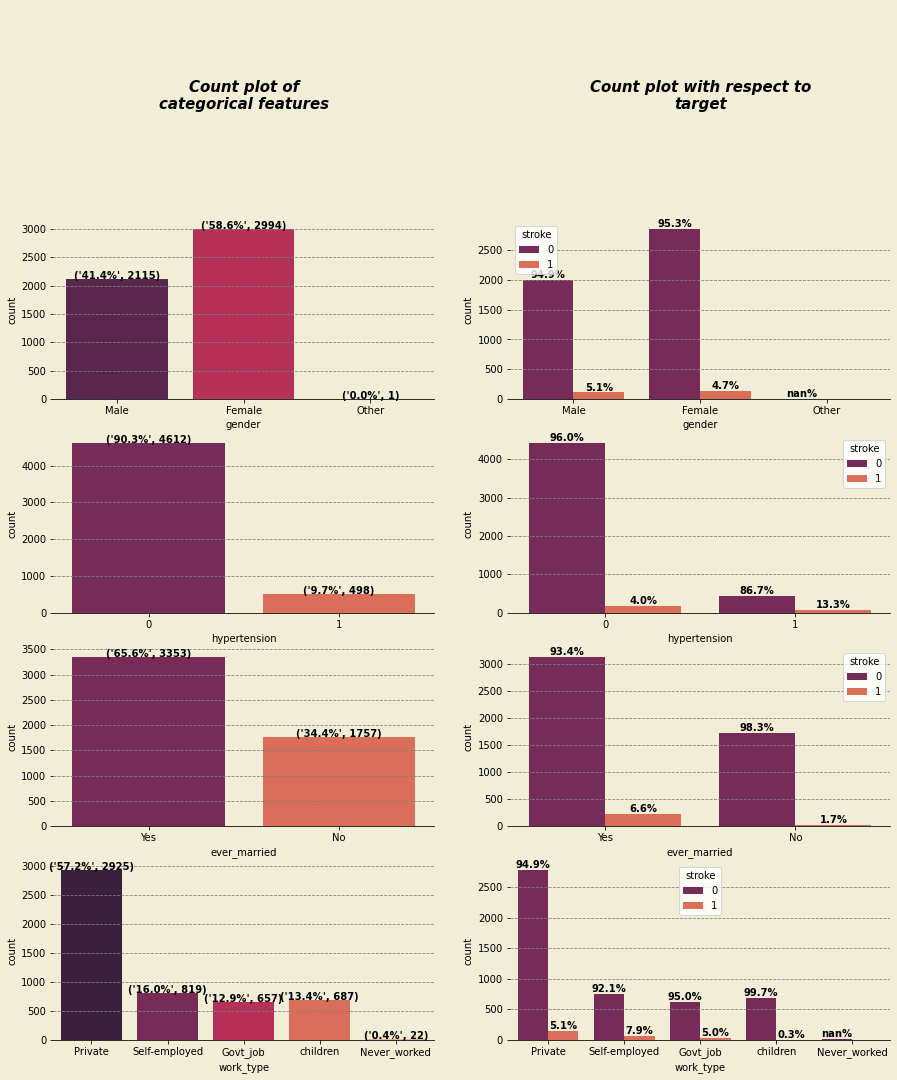

In [22]:
#First four columns
cat_columns= ['gender' , 'hypertension' , 'ever_married' , 'work_type']       
plotting_cat_features(5,2,cat_columns) 

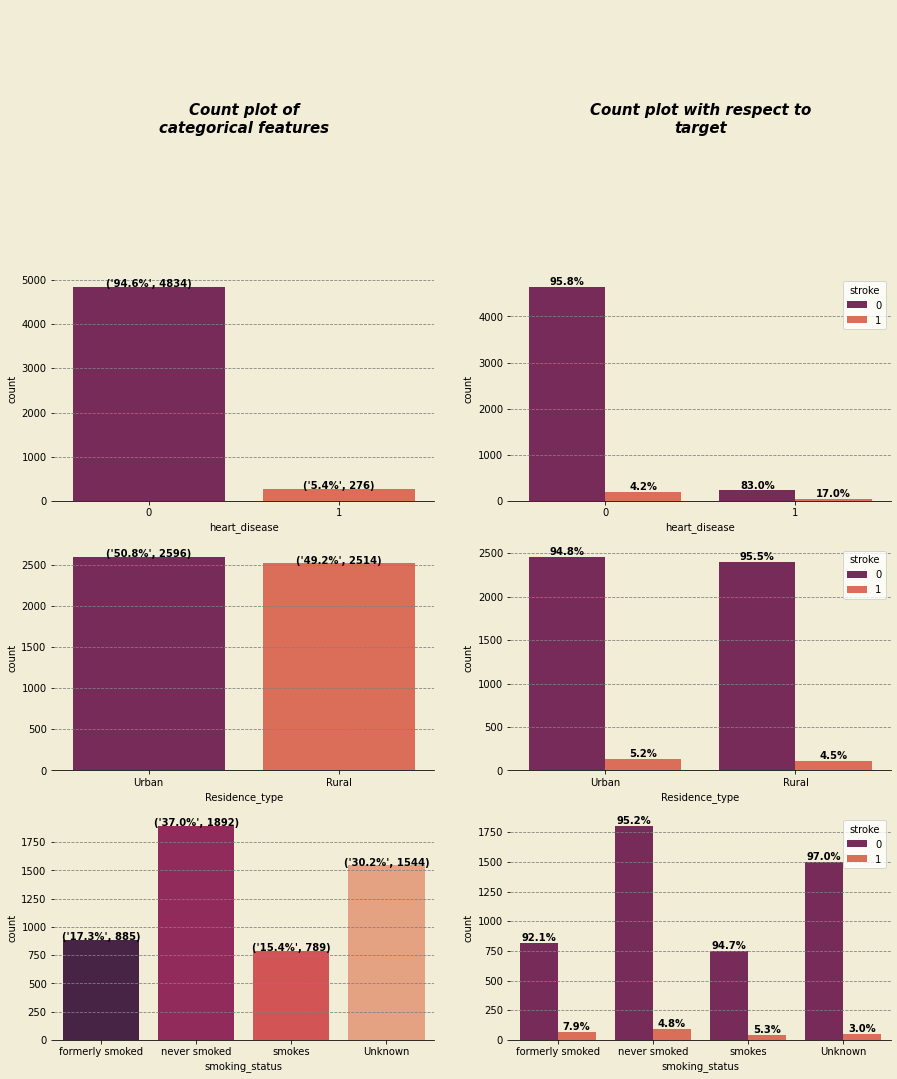

In [23]:
#Last three columns
cat_columns= ['heart_disease' , 'Residence_type' , 'smoking_status']       
plotting_cat_features(4,2,cat_columns) 

[Slide to top](#toc)
<html>
    <h1 style='color:#B1624EFF;background-color:#5CC8D7FF;font-size:20px;padding:20px;'><center><b>OBSERVATIONS FROM PLOTS OF CATEGORICAL FEATURES</b></center></h1>
    
</html>

* **4.7% of Females and 5.1% Males had strokes**

* **Only 13% of people who have hypertension had stroke i.e. 498x0.132530=66**

* **17% people who have heart disease had stroke and 4.1% who don't have heart disease**

* **6.5% of people who are married had stroke and 1.6% are not married had stroke**

* **5% of Government Job and Private Job people had stroke**

* **7.9% of Self-Employed people had stroke**

* **4.5% of people who live in Rural areas had stroke**

* **5.2% of people who live in Urban Areas had stroke**



[Slide to top](#toc)
<html>
    <a id="4.1.2"></a>
    <h1 style='color:#B1624EFF;background-color:#5CC8D7FF;font-size:20px;padding:10px;'><center><b>4.1.2. CONTINUOUS FEATURES</b></center></h1>
    
</html>

### **AGE**

**As we can see from people above the age of 40 are more likely to get strokes**

<AxesSubplot:xlabel='age', ylabel='Count'>

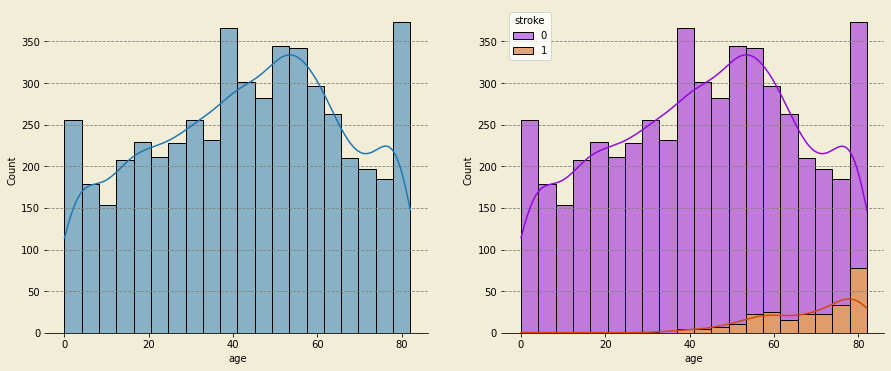

In [24]:
nrows=1
ncols=2
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')
        
        
sns.histplot(data=df,x='age',ax=ax[0],palette="Set1",kde="True")
sns.histplot(data=df,x='age',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True)

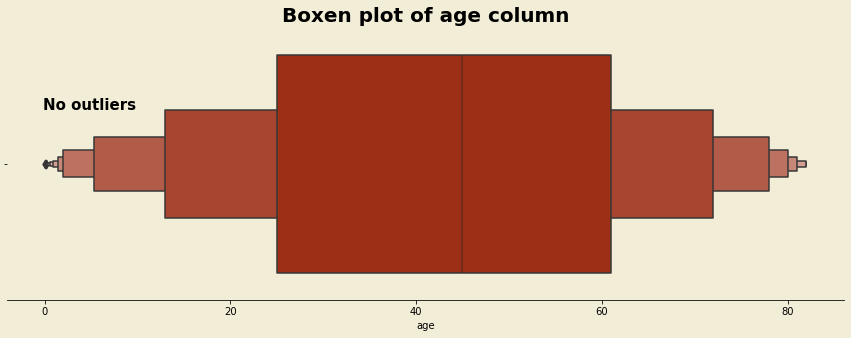

In [25]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')
        
plt.text(-0.2,-0.2,"No outliers",fontweight='bold',fontsize=15)
plt.title("Boxen plot of age column",fontweight='bold',fontsize=20)
ax=sns.boxenplot(data=df,x='age',palette="gnuplot")


**Log distribution of age**

<AxesSubplot:title={'center':'Log distribution of age'}, xlabel='age', ylabel='Count'>

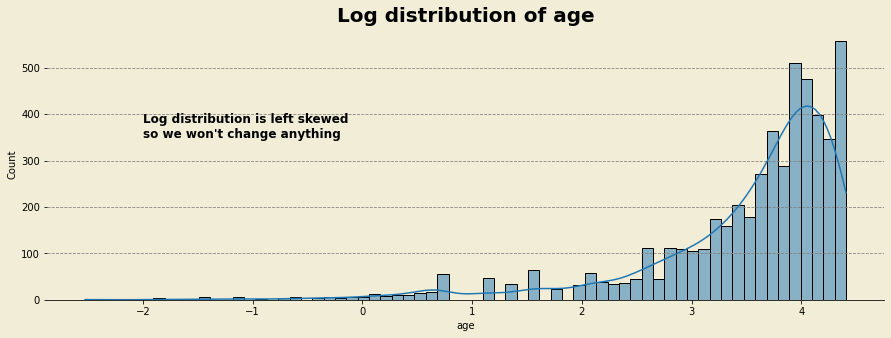

In [26]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

plt.text(-2,350,"Log distribution is left skewed\nso we won't change anything",fontweight='bold',fontsize=12)
plt.title("Log distribution of age",fontweight='bold',fontsize=20)
sns.histplot(np.log(df['age']),kde=True,palette="coolwarm")

### **BMI**

<AxesSubplot:xlabel='bmi', ylabel='Count'>

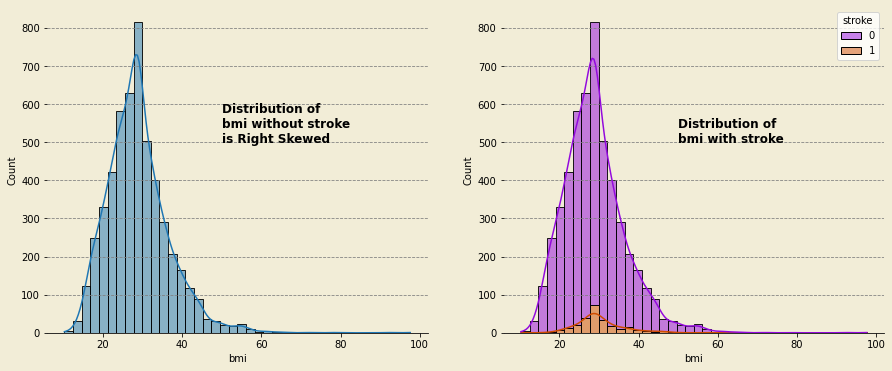

In [27]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')

ax[0].text(50,500,"Distribution of\nbmi without stroke\nis Right Skewed",fontweight='bold',fontsize=12)
sns.histplot(data=df,x='bmi',ax=ax[0],palette="coolwarm",kde="True",bins=40)
ax[1].text(50,500,"Distribution of\nbmi with stroke",fontweight='bold',fontsize=12)
sns.histplot(data=df,x='bmi',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True,bins=40)

**Bmi has lots of outliers**

In [28]:
#Outliers in bmi 
df_bmi=sorted(df['bmi'])
Q1,Q3=np.percentile(df_bmi,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print("Lower range of outliers : ",lower_range)
print("Upper range of outliers : ",upper_range)
df_lower_outliers=df[df.bmi<lower_range]
df_upper_outliers=df[df.bmi>upper_range]

Lower range of outliers :  10.300000000000006
Upper range of outliers :  46.29999999999999


In [29]:
print("***** Lower outliers of bmi *****")
print()
df_lower_outliers

***** Lower outliers of bmi *****



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0


In [30]:
print(df_upper_outliers.shape)
print()
print("Percentage of upper outliers in bmi are:", (125/5110)*100 )
print()
print("**** Outer outliers of bmi *****")
print()
df_upper_outliers


(125, 11)

Percentage of upper outliers in bmi are: 2.446183953033268

**** Outer outliers of bmi *****



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


<AxesSubplot:title={'center':'Box Plot of body mass index'}, xlabel='bmi'>

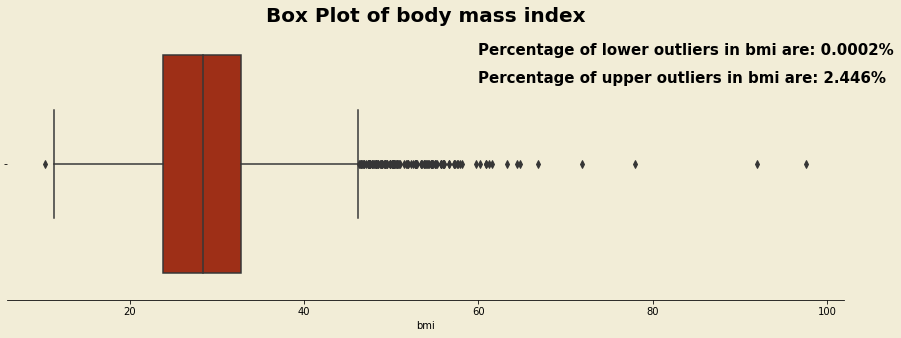

In [31]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

plt.text(60,-0.3,'Percentage of upper outliers in bmi are: 2.446%',fontweight='bold',fontsize=15)
plt.text(60,-0.4,'Percentage of lower outliers in bmi are: 0.0002%',fontweight='bold',fontsize=15)
plt.title("Box Plot of body mass index",fontweight='bold',fontsize=20)
sns.boxplot(data=df,x='bmi',palette='gnuplot')


In [32]:
#Dropping outliers
df1_without_outliers=df.drop(df[df.bmi>upper_range].index)

In [33]:
df1_without_outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


**DISTRIBUTION OF BMI WITHOUT OUTLIERS**

**Distribution of bmi become more normally distributed after removing outliers , so we will now consider this data for further modelling and prediction**

<AxesSubplot:xlabel='bmi', ylabel='Count'>

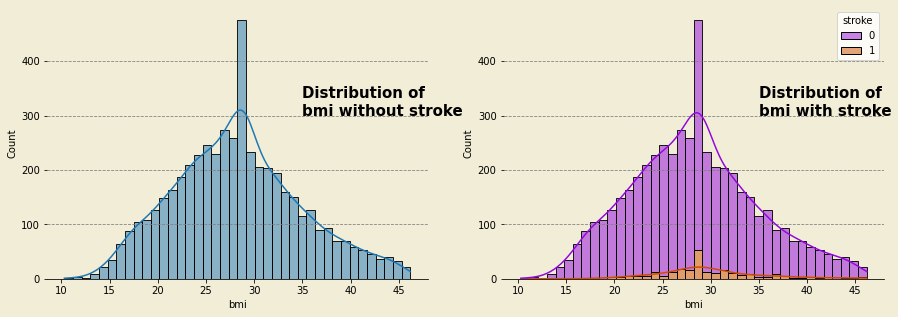

In [34]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')

ax[0].text(35,300,"Distribution of\nbmi without stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df1_without_outliers,x='bmi',ax=ax[0],palette="gnuplot",kde="True",bins=40)
ax[1].text(35,300,"Distribution of\nbmi with stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df1_without_outliers,x='bmi',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True,bins=40)

### **AVERAGE GLUCOSE LEVEL**

**Glucose level less than 150 and greater than 150 leading to strokes**

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

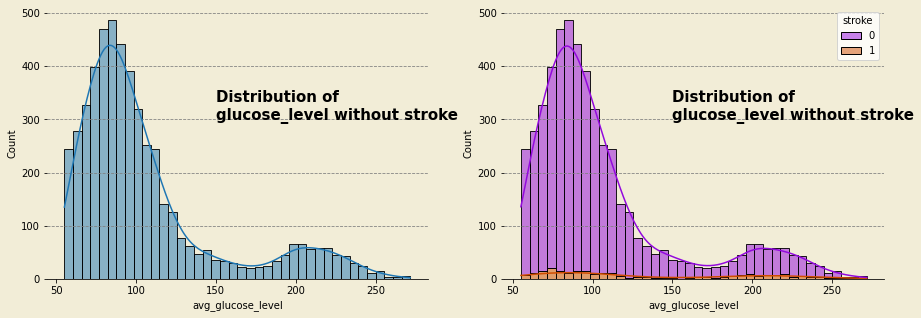

In [35]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')
    
ax[0].text(150,300,"Distribution of\nglucose_level without stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df,x='avg_glucose_level',ax=ax[0],palette="Set1",kde="True",bins=40)
ax[1].text(150,300,"Distribution of\nglucose_level without stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df,x='avg_glucose_level',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True,bins=40)

In [36]:
df_glucose=sorted(df['avg_glucose_level'])
Q1,Q3=np.percentile(df_glucose,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print("Lower range of outliers in avg_glucose_level : ",lower_range)
print("Upper range of outliers in avg_glucose_level : ",upper_range)
df_lower_outliers=df[df.avg_glucose_level<lower_range]
df_upper_outliers=df[df.avg_glucose_level>upper_range]

Lower range of outliers in avg_glucose_level :  21.97749999999997
Upper range of outliers in avg_glucose_level :  169.35750000000002


In [37]:
#No lower outlier
df_lower_outliers
print("Percentage of upper outliers in avg_glucose_level are:", (627/5110)*100 )
print()
print("***** Upper outliers of avg_glucose_level *****")
print()
df_upper_outliers #627 upper outliers for avg_glucose_level column

Percentage of upper outliers in avg_glucose_level are: 12.270058708414872

***** Upper outliers of avg_glucose_level *****



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


<AxesSubplot:xlabel='avg_glucose_level'>

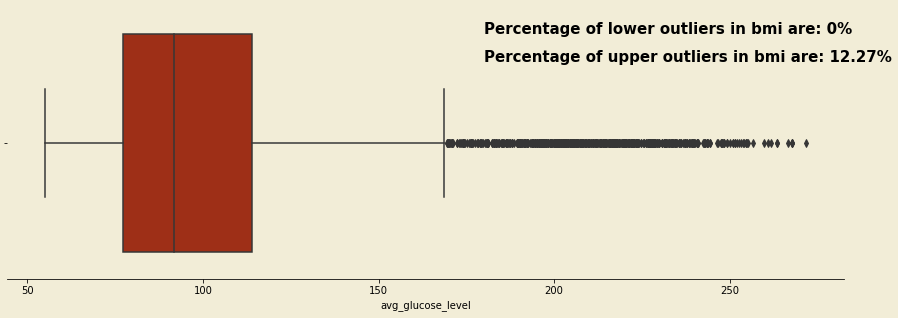

In [38]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

plt.text(180,-0.3,'Percentage of upper outliers in bmi are: 12.27%',fontweight='bold',fontsize=15)
plt.text(180,-0.4,'Percentage of lower outliers in bmi are: 0%',fontweight='bold',fontsize=15)
sns.boxplot(data=df,x='avg_glucose_level',palette='gnuplot')

**DISTRIBUTION OF GLUCOSE_LEVEL WITHOUT OUTLIERS**

In [39]:
df1_outliers_glucose=df.drop(df[df.avg_glucose_level>upper_range].index)

**Distribution of avg_glucose_level also got the same results like bmi but removing 12.27% of data from table will cause loss of information , so won't change anything**

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

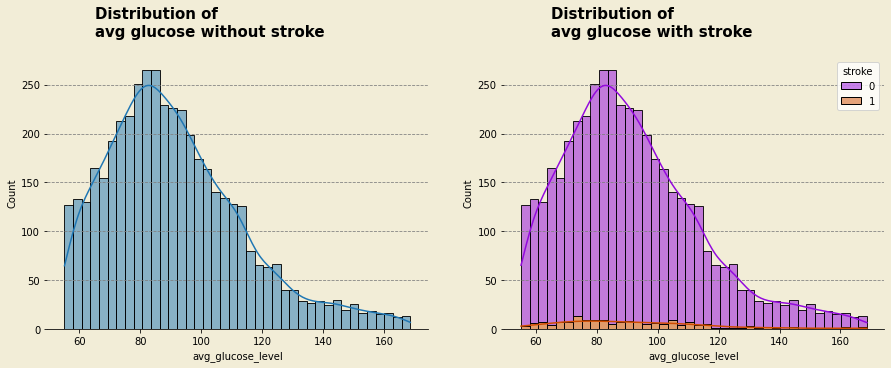

In [40]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
f.patch.set_facecolor('#F2EDD7FF')

#Setting background and foreground color
for j in range(0,ncols):
    ax[j].set_facecolor('#F2EDD7FF')
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].grid(linestyle="--",axis='y',color='gray')
    
ax[0].text(65,300,"Distribution of\navg glucose without stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df1_outliers_glucose,x='avg_glucose_level',ax=ax[0],palette="gnuplot",kde="True",bins=40)
ax[1].text(65,300,"Distribution of\navg glucose with stroke",fontweight='bold',fontsize=15)
sns.histplot(data=df1_outliers_glucose,x='avg_glucose_level',hue='stroke',multiple='stack',ax=ax[1],palette="gnuplot",kde=True,bins=40)

[Slide to top](#toc)
<html>
    <a id="4.1"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>4.2. BIVARIATE ANALYSIS</b></center></h1>
    
</html>

**ENCODING: ONE HOT ENCODING**

In [41]:
df1=pd.get_dummies(df1_without_outliers,columns=["work_type",'smoking_status'])
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [42]:
print("Number of Features : ",len(list(df1.columns)))

Number of Features :  18


In [43]:
df1['gender']=df1["gender"].map({"Male":0,"Female":1,"Other":2}).astype(int)
df1['ever_married']=df1["ever_married"].map({"Yes":1,"No":0}).astype(int)
df1['Residence_type']=df1["Residence_type"].map({"Urban":1,"Rural":0}).astype(int)

In [ ]:
""" 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 
'winter', 'winter_r' """


<AxesSubplot:>

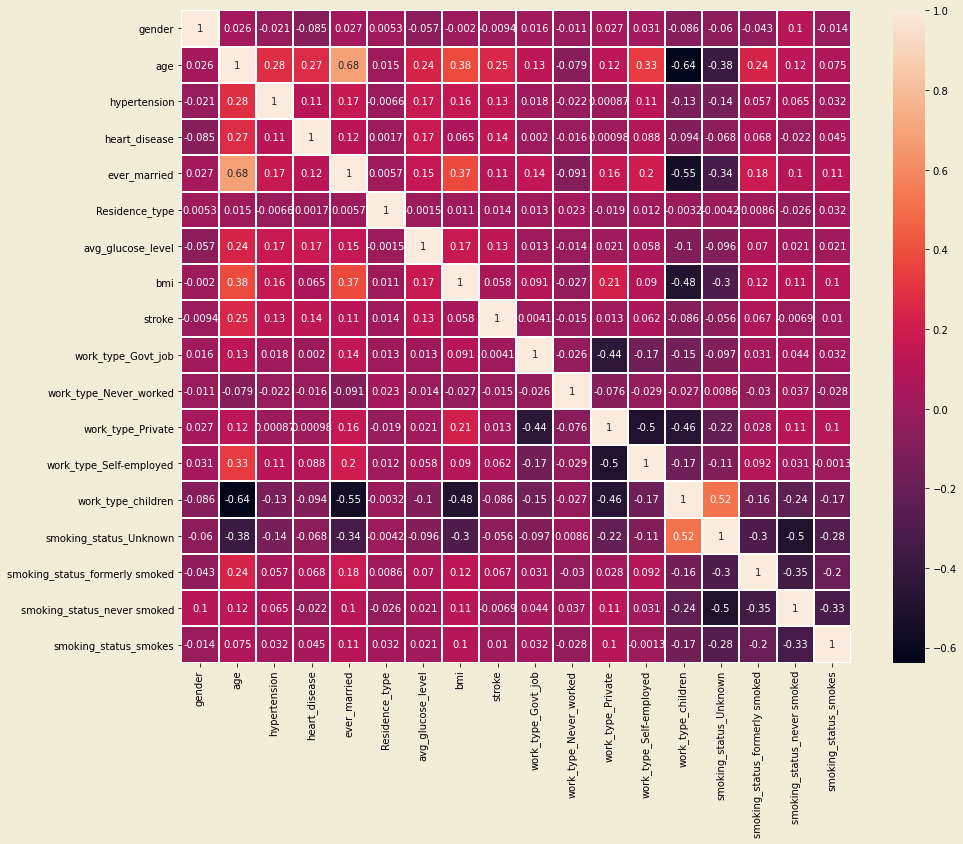

In [44]:
fig=plt.figure(figsize=(15,12))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")


sns.heatmap(df1.corr(),annot=True,linewidth=2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


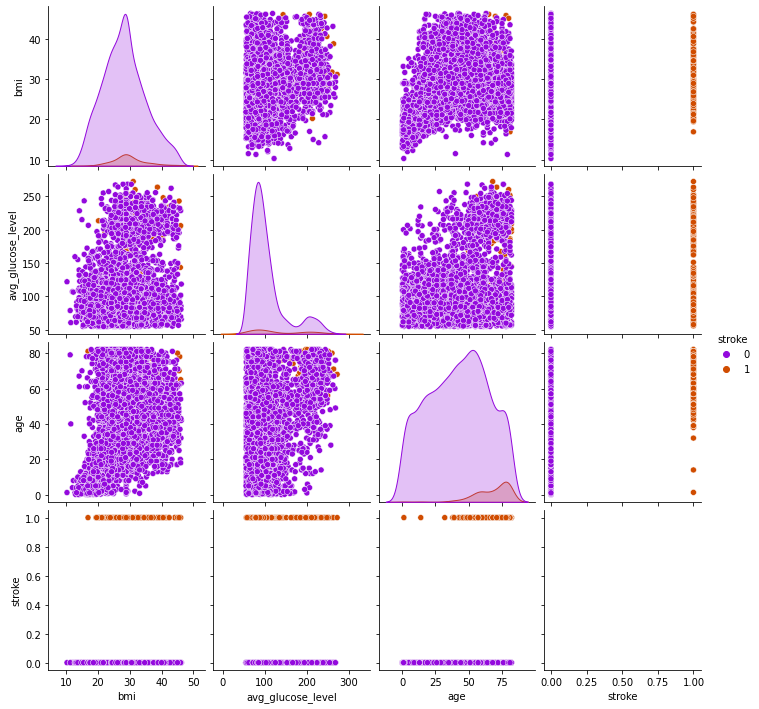

In [45]:
xvars=['bmi','avg_glucose_level','age','stroke']
yvars=['bmi','avg_glucose_level','age','stroke']
sns.pairplot(df1,x_vars=xvars,y_vars=yvars,hue="stroke",palette="gnuplot")

1. **There is no significant +ve and -ve correlation between two features**

2. **Age and ever_married are related by 0.68 which is obvious and work_type_children and age are -vely correlated and I think which is also very obvious to understand**

3. **People above the age of 40 are more likely to get strokes**

4. **You can also see increasing age lead to increasing        hypertension,heart_disease,bmi,avg_glucose_level and stroke (see the heatmap)**


<AxesSubplot:title={'center':'bmi vs avg_glucose_level'}, xlabel='avg_glucose_level', ylabel='bmi'>

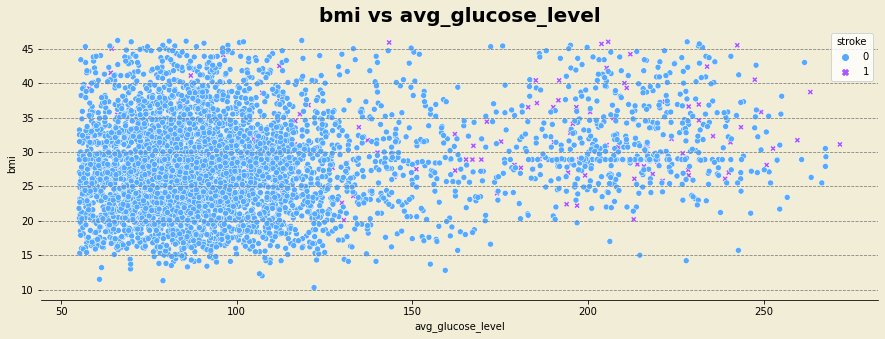

In [46]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')
plt.title("bmi vs avg_glucose_level",fontweight='bold',fontsize=20)
sns.scatterplot(data=df1,x=df1['avg_glucose_level'],y=df1['bmi'],hue='stroke',style='stroke',palette='cool')

<AxesSubplot:title={'center':'age vs avg_glucose_level'}, xlabel='avg_glucose_level', ylabel='age'>

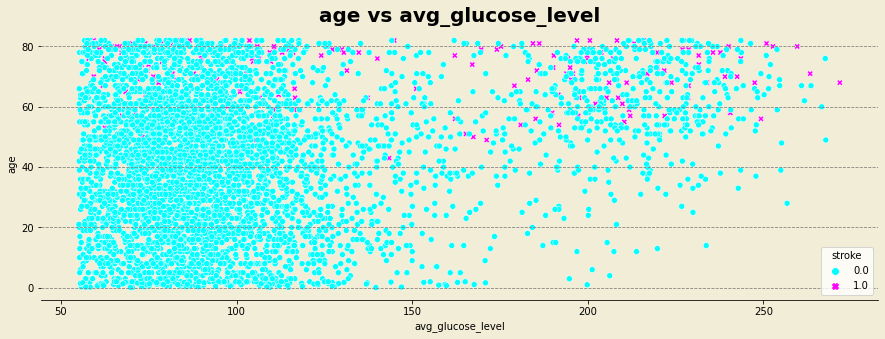

In [47]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')
plt.title("age vs avg_glucose_level",fontweight='bold',fontsize=20)

sns.scatterplot(data=df1,x=df['avg_glucose_level'],y=df['age'],hue='stroke',style='stroke',palette='cool')

<AxesSubplot:title={'center':'bmi vs age'}, xlabel='bmi', ylabel='age'>

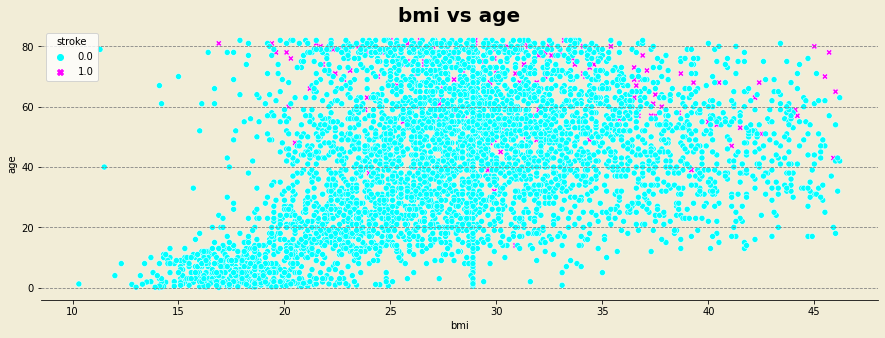

In [48]:
fig=plt.figure(figsize=(15,5))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')
plt.title("bmi vs age",fontweight='bold',fontsize=20)

sns.scatterplot(data=df1,x=df['bmi'],y=df['age'],hue='stroke',style='stroke',palette='cool')

[Slide to top](#toc)
<html>
    <a id="5"></a>
    <h1 style='color:#FCF6F5FF;background-color:#89ABE3FF;font-size:40px;font-style:italic;padding:10px;'><center><b>5. MODEL & PREDICTION</b></center></h1>
    
</html>


[Slide to top](#toc)
<html>
    <a id="5.1"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.1. OPTUNA + ONE HOT ENCODING + ENSEMBLING METHODS</b></center></h1>
    
</html>

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import optuna
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score,plot_roc_curve,f1_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [50]:
Y=df1['stroke']
X=df1.drop('stroke',axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.600000,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,0,1,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0


In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
#BEFORE RESAMPLING
print("'stroke' value counts before oversampling")
print()
y_train.value_counts()

'stroke' value counts before oversampling



0    3802
1     186
Name: stroke, dtype: int64

In [53]:
#Oversampling
smt=SMOTE()
x_train_sampling,y_train_sampling=smt.fit_resample(x_train,y_train)

In [54]:
#AFTER RESAMPLING
print("'stroke' value counts after oversampling")
print()

y_train_sampling.value_counts()

'stroke' value counts after oversampling



0    3802
1    3802
Name: stroke, dtype: int64

In [55]:
print("'stroke' value counts in test dataset")
print()

y_test.value_counts()

'stroke' value counts in test dataset



0    937
1     60
Name: stroke, dtype: int64

In [56]:
smt_test=SMOTE()
x_test_sampling,y_test_sampling=smt_test.fit_resample(x_test,y_test)

In [57]:
print("'stroke' value counts in test dataset after sampling")
print()

y_test_sampling.value_counts()

'stroke' value counts in test dataset after sampling



0    937
1    937
Name: stroke, dtype: int64

[Slide to top](#toc)
<html>
    <a id="5.1.1"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.1.1. RANDOM FOREST CLASSIFIER</b></center></h1>
    
</html>

In [58]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling, y_train_sampling, 
           n_jobs=-1, cv=5,scoring='f1').mean()
    



In [59]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2021-11-22 09:23:01,333] A new study created in memory with name: no-name-5f3d37d9-5eeb-4309-8e59-40aa6fa6b88e
[I 2021-11-22 09:23:07,083] Trial 0 finished with value: 0.964895301465568 and parameters: {'n_estimators': 195, 'max_depth': 13}. Best is trial 0 with value: 0.964895301465568.
[I 2021-11-22 09:23:07,542] Trial 1 finished with value: 0.9656331464831631 and parameters: {'n_estimators': 25, 'max_depth': 21}. Best is trial 1 with value: 0.9656331464831631.
[I 2021-11-22 09:23:08,271] Trial 2 finished with value: 0.9670175189035526 and parameters: {'n_estimators': 40, 'max_depth': 35}. Best is trial 2 with value: 0.9670175189035526.
[I 2021-11-22 09:23:09,950] Trial 3 finished with value: 0.9658568133523439 and parameters: {'n_estimators': 102, 'max_depth': 13}. Best is trial 2 with value: 0.9670175189035526.
[I 2021-11-22 09:23:11,195] Trial 4 finished with value: 0.9668871005056872 and parameters: {'n_estimators': 73, 'max_depth': 16}. Best is trial 2 with value: 0.967017518

In [60]:
trial = study.best_trial
print("***** Best parameters *****")
print(trial.values)
print(trial.params)

***** Best parameters *****
[0.9690334904118387]
{'n_estimators': 86, 'max_depth': 37}


In [61]:
clf=RandomForestClassifier(n_estimators=129,max_depth=36)
clf.fit(x_train_sampling,y_train_sampling)


RandomForestClassifier(max_depth=36, n_estimators=129)

In [62]:
pred_rf=clf.predict(x_test_sampling)
print("***** Accuracy of random forest classifier *****")
print()
print(accuracy_score(y_test_sampling,pred_rf))

***** Accuracy of random forest classifier *****

0.8810032017075774


In [63]:
print("***** CLassification report of random forest classifier ****")
print()
print(classification_report(y_test_sampling,pred_rf))

***** CLassification report of random forest classifier ****

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       937
           1       0.98      0.78      0.87       937

    accuracy                           0.88      1874
   macro avg       0.90      0.88      0.88      1874
weighted avg       0.90      0.88      0.88      1874



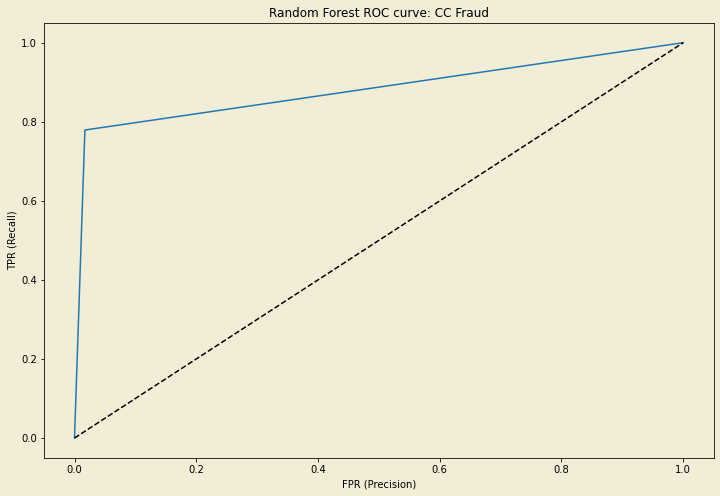

Area under curve (AUC):  0.8810032017075774


In [64]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test_sampling,pred_rf)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))


[Slide to top](#toc)
<html>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b> FEATURE IMPORTANCE OF RF CLASSIFIER</b></center></h1>
    
</html>

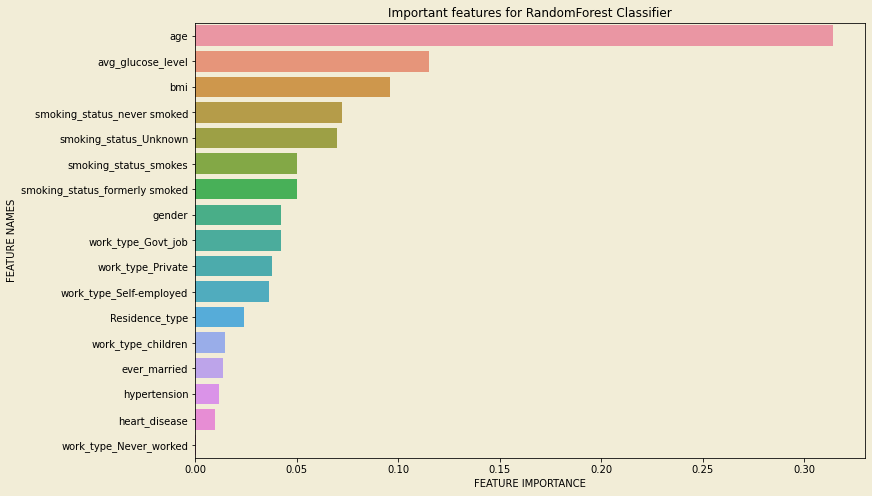

In [65]:
feature_importance = np.array(clf.feature_importances_)
feature_names = np.array(x_train_sampling.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.title("Important features for RandomForest Classifier")
plt.show()


[Slide to top](#toc)
<html>
    <a id="5.1.2"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.1.2. LGBM CLASSIFIER</b></center></h1>
    
</html>

In [66]:
import lightgbm as lgb

In [67]:
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 300)
    max_depth = int(trial.suggest_int('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,1)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,1)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    return cross_val_score(clf, x_train_sampling, y_train_sampling, 
           n_jobs=-1, cv=5,scoring='f1').mean()


In [68]:
study_lgbm= optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=40)

[I 2021-11-22 09:25:22,186] A new study created in memory with name: no-name-e67f94cd-dca7-41c0-9486-647c95937008
[I 2021-11-22 09:25:24,603] Trial 0 finished with value: 0.9397240708447517 and parameters: {'n_estimators': 234, 'max_depth': 14, 'learning_rate': 0.0025206616197898843, 'colsample_bytree': 0.30829998803983966, 'num_leaves': 294, 'reg_alpha': 0.18102030355146403, 'reg_lambda': 0.36244540905849687, 'min_split_gain': 0.10704978078336544, 'subsample': 0.1609477586037823}. Best is trial 0 with value: 0.9397240708447517.
[I 2021-11-22 09:25:25,348] Trial 1 finished with value: 0.9529468926480369 and parameters: {'n_estimators': 214, 'max_depth': 26, 'learning_rate': 0.09536577380290186, 'colsample_bytree': 0.10479570829553973, 'num_leaves': 260, 'reg_alpha': 0.3454932205414906, 'reg_lambda': 0.5935637230125193, 'min_split_gain': 0.2308939367753641, 'subsample': 0.16977085650122106}. Best is trial 1 with value: 0.9529468926480369.
[I 2021-11-22 09:25:26,451] Trial 2 finished wit

In [69]:
trial_lgbm= study_lgbm.best_trial
print("***** Best parameters *****")
print(trial_lgbm.value)
print(trial_lgbm.params)

***** Best parameters *****
0.9660035690544987
{'n_estimators': 284, 'max_depth': 16, 'learning_rate': 0.03530663024564914, 'colsample_bytree': 0.6219049446833518, 'num_leaves': 162, 'reg_alpha': 0.361370989459976, 'reg_lambda': 0.2767783282346008, 'min_split_gain': 0.25466919950338857, 'subsample': 0.9990125108475376}


In [70]:
model_lgbm=lgb.LGBMClassifier(n_estimators=139, max_depth=21, learning_rate=0.045552659197751554, 
                              colsample_bytree=0.5296024837571571, num_leaves=161, reg_alpha=0.13175537618486874, 
                              reg_lambda=0.31574328097598714, 
                              min_split_gain=0.18022256039561763,subsample=0.35631707963483955)

In [71]:
model_lgbm.fit(x_train_sampling,y_train_sampling)

LGBMClassifier(colsample_bytree=0.5296024837571571,
               learning_rate=0.045552659197751554, max_depth=21,
               min_split_gain=0.18022256039561763, n_estimators=139,
               num_leaves=161, reg_alpha=0.13175537618486874,
               reg_lambda=0.31574328097598714, subsample=0.35631707963483955)

In [98]:
filename = "LGBMClassifier.sav"
pickle.dump(model_lgbm,open(filename,'wb'))

In [72]:
pred_lgbm=model_lgbm.predict(x_test_sampling)
print("***** Accuracy of LGBM classifier *****")
print()
print(accuracy_score(pred_lgbm,y_test_sampling))

***** Accuracy of LGBM classifier *****

0.8964781216648879


In [73]:
print(classification_report(y_test_sampling,pred_lgbm))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       937
           1       0.96      0.83      0.89       937

    accuracy                           0.90      1874
   macro avg       0.90      0.90      0.90      1874
weighted avg       0.90      0.90      0.90      1874



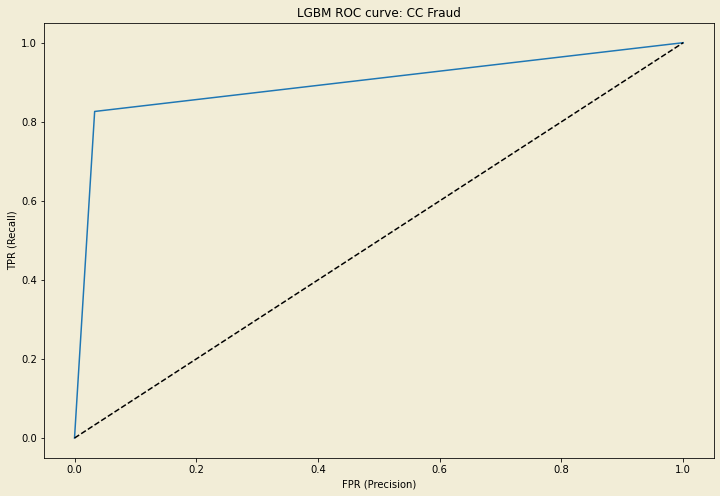

Area under curve (AUC):  0.896478121664888


In [74]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test_sampling,pred_lgbm)

plt.title('LGBM ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))


[Slide to top](#toc)
<html>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b> FEATURE IMPORTANCE OF LGBM CLASSIFIER</b></center></h1>
    
</html>

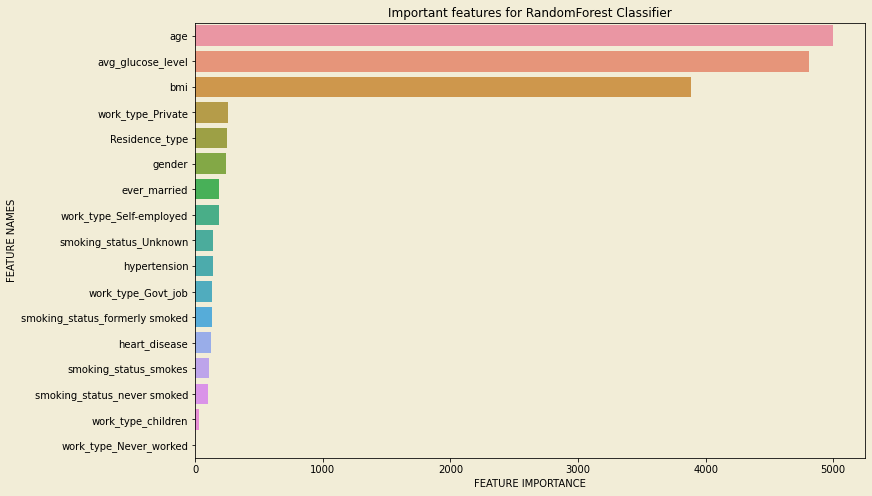

In [75]:
feature_importance = np.array(model_lgbm.feature_importances_)
feature_names = np.array(x_train_sampling.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.title("Important features for RandomForest Classifier")
plt.show()


[Slide to top](#toc)
<html>
    <a id="5.2"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.2. OPTUNA + LABEL ENCODING + ENSEMBLING METHODS</b></center></h1>
    
</html>

In [76]:
df2=df1_without_outliers.copy()
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### **LABEL ENCODING**

In [77]:
df2['gender']=df2["gender"].map({"Male":0,"Female":1,"Other":2}).astype(int)
df2['ever_married']=df2["ever_married"].map({"Yes":1,"No":0}).astype(int)
df2['Residence_type']=df2["Residence_type"].map({"Urban":1,"Rural":0}).astype(int)
df2['work_type']=df2['work_type'].map({"Private":0,'Self-employed':1,'children':2,'Govt_job':3,
                                      "Never_worked":4})
df2['smoking_status']=df2['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,
                                                "smokes":3})

df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.600000,2,1
1,1,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,1,49.0,0,0,1,0,1,171.23,34.400000,3,1
4,1,79.0,1,0,1,1,0,174.12,24.000000,0,1


<AxesSubplot:>

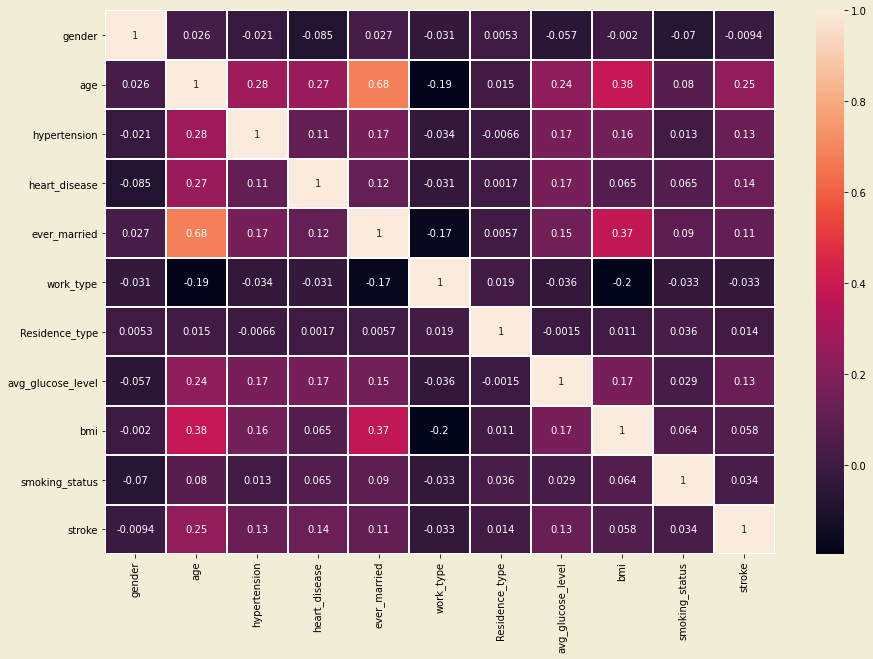

In [78]:
fig=plt.figure(figsize=(15,10))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.heatmap(df2.corr(),annot=True,linewidth=2)

In [79]:
Y_new=df2['stroke']
X_new=df2.drop('stroke',axis=1)


In [80]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(X_new,Y_new,test_size=0.2,random_state=42)

In [81]:
smt=SMOTE()
x_train_sampling_new,y_train_sampling_new=smt.fit_resample(x_train_new,y_train_new)

In [82]:
smt_test=SMOTE()
x_test_sampling_new,y_test_sampling_new=smt_test.fit_resample(x_test_new,y_test_new)

[Slide to top](#toc)
<html>
    <a id="5.2.1"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.2.1. RANDOM FOREST CLASSIFIER</b></center></h1>
    
</html>

In [83]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()

In [84]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)


[I 2021-11-22 09:27:33,164] A new study created in memory with name: no-name-698cad5e-191f-474f-b7c2-ab6b66ac0759
[I 2021-11-22 09:27:34,963] Trial 0 finished with value: 0.9461508900291283 and parameters: {'n_estimators': 86, 'max_depth': 22}. Best is trial 0 with value: 0.9461508900291283.
[I 2021-11-22 09:27:36,478] Trial 1 finished with value: 0.9240920519536155 and parameters: {'n_estimators': 79, 'max_depth': 11}. Best is trial 0 with value: 0.9461508900291283.
[I 2021-11-22 09:27:36,860] Trial 2 finished with value: 0.8680833257672604 and parameters: {'n_estimators': 25, 'max_depth': 6}. Best is trial 0 with value: 0.9461508900291283.
[I 2021-11-22 09:27:39,061] Trial 3 finished with value: 0.9480904556591806 and parameters: {'n_estimators': 107, 'max_depth': 32}. Best is trial 3 with value: 0.9480904556591806.
[I 2021-11-22 09:27:39,194] Trial 4 finished with value: 0.8478943456288915 and parameters: {'n_estimators': 7, 'max_depth': 5}. Best is trial 3 with value: 0.94809045565

In [86]:
trial = study.best_trial
print("***** Best Parameters *****")
print(trial.value)
print(trial.params)

***** Best Parameters *****
0.9491459052718092
{'n_estimators': 128, 'max_depth': 27}


In [87]:
clf=RandomForestClassifier(n_estimators=88,max_depth=28)
clf.fit(x_train_sampling_new,y_train_sampling_new)


RandomForestClassifier(max_depth=28, n_estimators=88)

In [88]:
pred_new=clf.predict(x_test_sampling_new)
print("***** Accuracy if random forest classifier *****")
print(accuracy_score(y_test_sampling_new,pred_new))

***** Accuracy if random forest classifier *****
0.7406616862326574


In [89]:
print("***** Classification report of random forest *****")
print()
print(classification_report(y_test_sampling_new,pred_new))

***** Classification report of random forest *****

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       937
           1       0.90      0.54      0.68       937

    accuracy                           0.74      1874
   macro avg       0.78      0.74      0.73      1874
weighted avg       0.78      0.74      0.73      1874



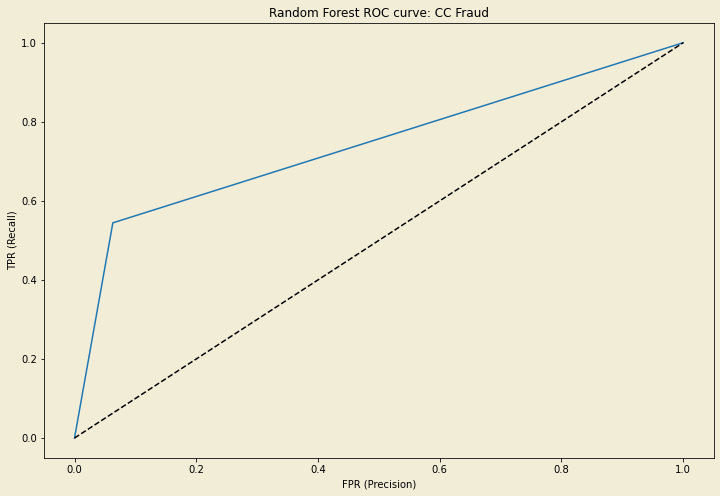

Area under curve (AUC):  0.7406616862326575


In [90]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test_sampling_new,pred_new)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))


[Slide to top](#toc)
<html>
    <a id="5.2.2"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>5.2.2. LGBM CLASSIFIER</b></center></h1>
    
</html>

In [91]:
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 300)
    max_depth = int(trial.suggest_loguniform('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,1)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,1)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()


In [92]:
study_lgbm= optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=40)

[I 2021-11-22 09:29:20,963] A new study created in memory with name: no-name-fd202d3f-e1a1-450d-abe6-4fce1e04aa69
[I 2021-11-22 09:29:21,688] Trial 0 finished with value: 0.8828304038917084 and parameters: {'n_estimators': 290, 'max_depth': 4.66400439750932, 'learning_rate': 0.031178717612893793, 'colsample_bytree': 0.2551599642870815, 'num_leaves': 161, 'reg_alpha': 0.10215246443213197, 'reg_lambda': 0.44546300275859824, 'min_split_gain': 0.3676794861622815, 'subsample': 0.731510019502837}. Best is trial 0 with value: 0.8828304038917084.
[I 2021-11-22 09:29:22,042] Trial 1 finished with value: 0.9451859482987166 and parameters: {'n_estimators': 203, 'max_depth': 24.39438853764247, 'learning_rate': 0.5156095501559793, 'colsample_bytree': 0.20214262236481295, 'num_leaves': 218, 'reg_alpha': 0.12180461615556282, 'reg_lambda': 0.3933548165144501, 'min_split_gain': 0.708730144308204, 'subsample': 0.4039820639918892}. Best is trial 1 with value: 0.9451859482987166.
[I 2021-11-22 09:29:22,43

In [93]:
trial_lgbm= study_lgbm.best_trial
print("***** Best parameters *****")
print(trial_lgbm.value)
print(trial_lgbm.params)

***** Best parameters *****
0.9587370448425974
{'n_estimators': 299, 'max_depth': 18.040826211977645, 'learning_rate': 0.051619254830647894, 'colsample_bytree': 0.67088016461132, 'num_leaves': 276, 'reg_alpha': 0.239227450212045, 'reg_lambda': 0.45883049846718615, 'min_split_gain': 0.1021741828793782, 'subsample': 0.5358073452831477}


In [94]:
model_lgbm=lgb.LGBMClassifier(n_estimators=228, max_depth=49, learning_rate=0.07246416747184325, 
                              colsample_bytree=0.659803224139728, num_leaves=182, reg_alpha=0.2647777683795973, 
                              reg_lambda=0.5432085589936458, 
                              min_split_gain=0.10089495584597963,subsample=0.17472830028174025)

In [95]:
model_lgbm.fit(x_train_sampling_new,y_train_sampling_new)
pred=model_lgbm.predict(x_test_sampling_new)
print(accuracy_score(y_test_sampling_new,pred))

0.8319103521878335


In [96]:
print("***** Classification Report of LGBM *****")
print(classification_report(y_test_sampling_new,pred))

***** Classification Report of LGBM *****
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       937
           1       0.95      0.70      0.81       937

    accuracy                           0.83      1874
   macro avg       0.86      0.83      0.83      1874
weighted avg       0.86      0.83      0.83      1874



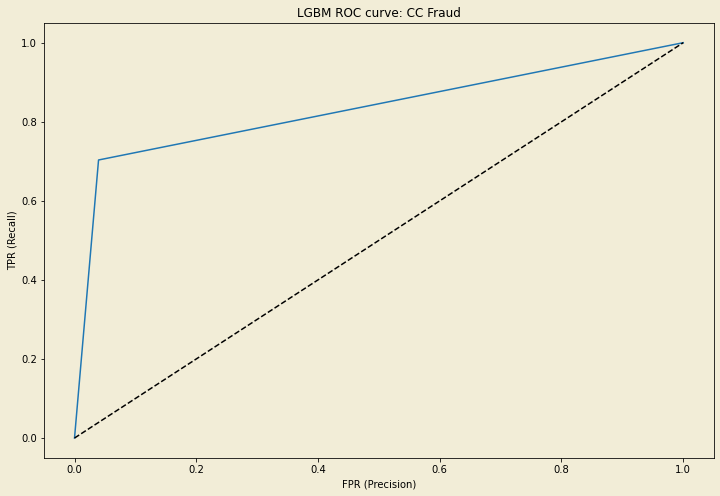

Area under curve (AUC):  0.8319103521878335


In [97]:
fig=plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

fpr,tpr,_=roc_curve(y_test_sampling_new,pred)

plt.title('LGBM ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))


[Slide to top](#toc)
<html>
    <a id="5.2.2"></a>
    <h1 style='color:#0063B2FF;background-color:#9CC3D5FF;font-size:30px;padding:10px;'><center><b>ANY SUGGESTIONS ARE MOST WELCOMED , PLEASE GIVE IT A UPVOTE</b></center></h1>
    
</html>

**I HAVE GOT HIGHEST AUC(AREA UNDER CURVE) OF 0.90 WITH ONE HOT ENCODING AND LGBM CLASSIFIER**

**IF YOU THINK THAT I HAVE TO SOMETHING MORE OR ANY STEP TO INCREASE MY AUC TELL ME IN THE COMMENTS I WILL EDIT THIS NOTEBOOK AGAIN ACCORDING TO THE SUGGESTIONS**

**GIVE IT A UPVOTE MAY IT CAN HELP ME TO GET A JOB/INTERNSHIP**

